In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', parser='auto', as_frame=False)
list(mnist)

['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

In [15]:
X, y = mnist.data, mnist.target
X.shape

(70000, 784)

In [16]:
X[0].mean()

35.108418367346935

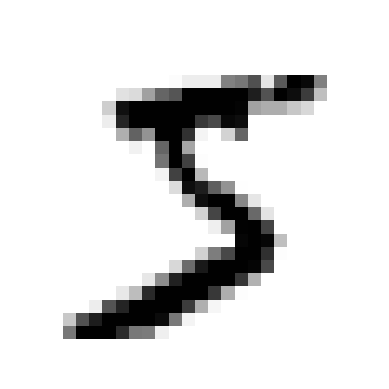

In [14]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [18]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)   # loss="hinge" ===> SVM
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(sgd_clf.predict(X_test), y_test_5)

0.9492

In [23]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [27]:
print("precision: ", cm[1, 1] / (cm[1, 1] + cm[0, 1]))
print("recall: ", cm[1, 1] / (cm[1, 1] + cm[1, 0]))

precision:  0.8370879772350012
recall:  0.6511713705958311


In [28]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [29]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_train_5, y_train_pred))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     54579
        True       0.84      0.65      0.73      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.82      0.85     60000
weighted avg       0.95      0.96      0.95     60000



In [ ]:
X_batch_test = X_test[:1000]
y_batch_test = y_test_5[:1000] 

sgd_clf.predict(X_batch_test)

In [66]:
decision_score_test = sgd_clf.decision_function(X_batch_test)
thresholds = []
precisions = []
recalls = []
for threshold in range(0, 10 ** 4, 10):
    y_batch_prediction = decision_score_test > threshold
    thresholds.append(threshold)
    precisions.append(precision_score(y_batch_test, y_batch_prediction))
    recalls.append(recall_score(y_batch_test, y_batch_prediction))

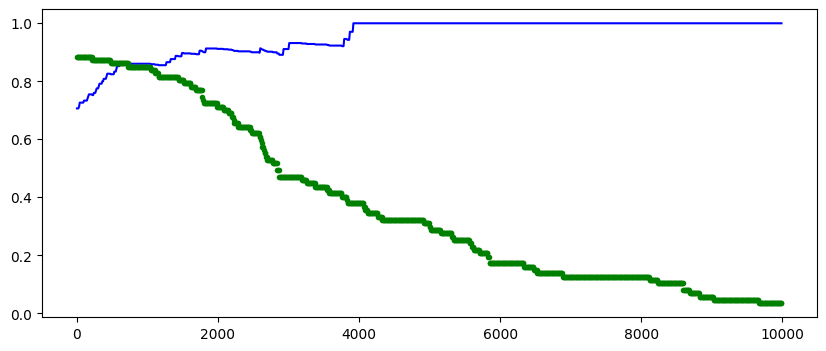

In [70]:
fig, ax = plt.subplots(figsize = (10, 4))

ax.plot(thresholds, precisions, "b-")
ax.plot(thresholds, recalls, "g.")

plt.show()

Text(0, 0.5, 'precision')

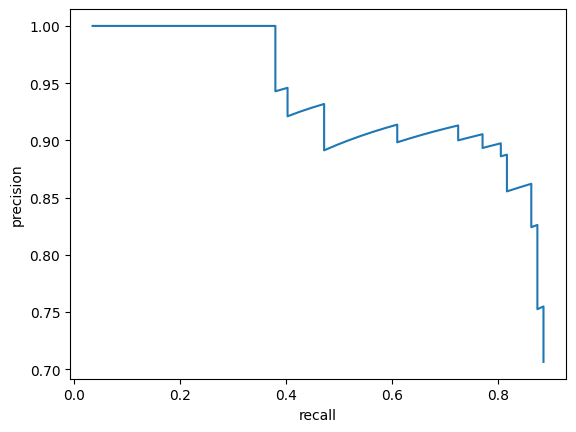

In [73]:
plt.plot(recalls, precisions)

plt.xlabel("recall")
plt.ylabel("precision")

In [79]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [80]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [83]:
thresholds

array([             inf,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

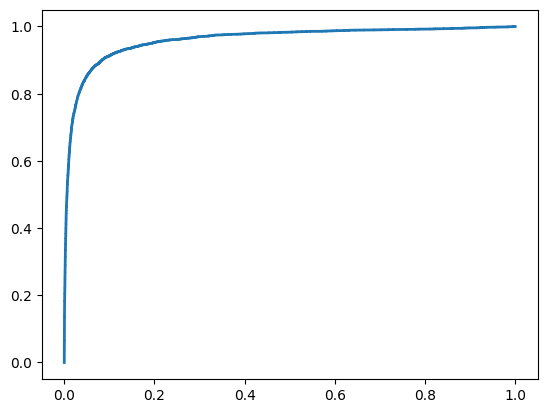

In [84]:
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")

In [86]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
y_scores_rf = cross_val_predict(rf_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_rf

array([[0.14, 0.86],
       [0.99, 0.01],
       [1.  , 0.  ],
       ...,
       [0.01, 0.99],
       [0.93, 0.07],
       [0.92, 0.08]])

In [88]:
y_scores_rf = y_scores_rf[:, 1]

In [89]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_5, y_scores_rf)

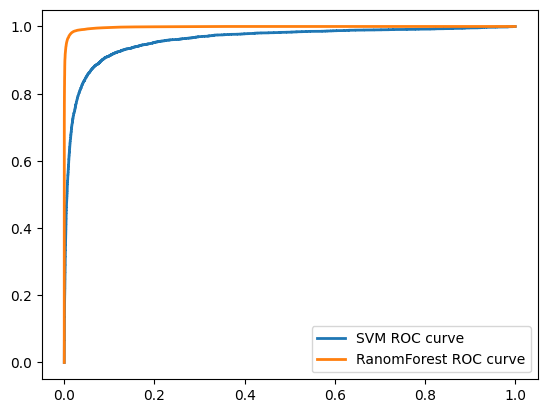

In [91]:
plt.plot(fpr, tpr, linewidth=2, label="SVM ROC curve")
plt.plot(fpr_rf, tpr_rf, linewidth=2, label="RanomForest ROC curve")
plt.legend()
plt.show()

In [94]:
from sklearn.metrics import roc_auc_score

### Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) f
roc_auc_score(y_train_5, y_scores_rf)

0.9983041037583321

In [93]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616